In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [43]:
file_path = "class10-2022.csv"
df = pd.read_csv(file_path)

In [45]:
df

,Class,Year,Region,Status,CTSA,GOVT,GOVT AIDED,INDEPENDENT,JNV,KV
0,10,2022,Ajmer,Regd.,NaN,8537,NaN,102253,4945,9194
1,10,2022,Ajmer,Appd.,NaN,8509,NaN,101822,4928,9160
2,10,2022,Ajmer,Pass,NaN,8154,NaN,100178,4911,8875
3,10,2022,Bengaluru,Regd.,99.0,151,NaN,60667,2442,5108
4,10,2022,Bengaluru,Appd.,97.0,151,NaN,60555,2440,5093
5,10,2022,Bengaluru,Pass,94.0,151,NaN,60089,2440,5042
6,10,2022,Bhopal,Regd.,NaN,5802,NaN,84877,4171,9126
7,10,2022,Bhopal,Appd.,NaN,5681,NaN,84390,4160,9094
8,10,2022,Bhopal,Pass,NaN,4837,NaN,79048,4152,8406
9,10,2022,Bhubaneswar,Regd.,102.0,17252,NaN,81012,5295,13489


In [47]:
df.size

480

In [49]:
df.shape

(48, 10)

In [51]:
df.describe


<bound method NDFrame.describe of     Class  Year       Region Status   CTSA    GOVT  GOVT AIDED  INDEPENDENT  \
0      10  2022        Ajmer  Regd.    NaN    8537         NaN       102253   
1      10  2022        Ajmer  Appd.    NaN    8509         NaN       101822   
2      10  2022        Ajmer   Pass    NaN    8154         NaN       100178   
3      10  2022    Bengaluru  Regd.   99.0     151         NaN        60667   
4      10  2022    Bengaluru  Appd.   97.0     151         NaN        60555   
5      10  2022    Bengaluru   Pass   94.0     151         NaN        60089   
6      10  2022       Bhopal  Regd.    NaN    5802         NaN        84877   
7      10  2022       Bhopal  Appd.    NaN    5681         NaN        84390   
8      10  2022       Bhopal   Pass    NaN    4837         NaN        79048   
9      10  2022  Bhubaneswar  Regd.  102.0   17252         NaN        81012   
10     10  2022  Bhubaneswar  Appd.  101.0   17036         NaN        80621   
11     10  2022  B

In [53]:
df.info

<bound method DataFrame.info of     Class  Year       Region Status   CTSA    GOVT  GOVT AIDED  INDEPENDENT  \
0      10  2022        Ajmer  Regd.    NaN    8537         NaN       102253   
1      10  2022        Ajmer  Appd.    NaN    8509         NaN       101822   
2      10  2022        Ajmer   Pass    NaN    8154         NaN       100178   
3      10  2022    Bengaluru  Regd.   99.0     151         NaN        60667   
4      10  2022    Bengaluru  Appd.   97.0     151         NaN        60555   
5      10  2022    Bengaluru   Pass   94.0     151         NaN        60089   
6      10  2022       Bhopal  Regd.    NaN    5802         NaN        84877   
7      10  2022       Bhopal  Appd.    NaN    5681         NaN        84390   
8      10  2022       Bhopal   Pass    NaN    4837         NaN        79048   
9      10  2022  Bhubaneswar  Regd.  102.0   17252         NaN        81012   
10     10  2022  Bhubaneswar  Appd.  101.0   17036         NaN        80621   
11     10  2022  Bhu

In [55]:
df.head()

,Class,Year,Region,Status,CTSA,GOVT,GOVT AIDED,INDEPENDENT,JNV,KV
0,10,2022,Ajmer,Regd.,NaN,8537,NaN,102253,4945,9194
1,10,2022,Ajmer,Appd.,NaN,8509,NaN,101822,4928,9160
2,10,2022,Ajmer,Pass,NaN,8154,NaN,100178,4911,8875
3,10,2022,Bengaluru,Regd.,99.0,151,NaN,60667,2442,5108
4,10,2022,Bengaluru,Appd.,97.0,151,NaN,60555,2440,5093


In [57]:
df.columns

Index(['Class', 'Year', 'Region', 'Status', 'CTSA', 'GOVT', 'GOVT AIDED',
       'INDEPENDENT', 'JNV', 'KV'],
      dtype='object')

In [59]:
df.fillna(0, inplace=True)

In [61]:
df["Total_Students"] = df[["GOVT", "GOVT AIDED", "INDEPENDENT", "JNV", "KV"]].sum(axis=1)

In [64]:
df["Total_Students"]

0     124929.0
1     124419.0
2     122118.0
3      68368.0
4      68239.0
5      67722.0
6     103976.0
7     103325.0
8      96443.0
9     117048.0
10    116375.0
11    112306.0
12    137615.0
13    137265.0
14    130945.0
15    148364.0
16    147961.0
17    146445.0
18     85403.0
19     84998.0
20     79432.0
21    218484.0
22    216842.0
23    188734.0
24    147609.0
25    146215.0
26    125752.0
27     66757.0
28     65894.0
29     54359.0
30    140390.0
31    139045.0
32    133660.0
33    161079.0
34    160463.0
35    154585.0
36    235231.0
37    231949.0
38    226674.0
39    189821.0
40    187716.0
41    177943.0
42     93886.0
43     93546.0
44     91144.0
45     68004.0
46     67935.0
47     67718.0
Name: Total_Students, dtype: float64

In [66]:
df_pass = df[df["Status"] == "Pass"]
df["Absentee_Percent"] = 100 - (df_pass["Total_Students"] / df["Total_Students"]) * 100
df["Absentee_Percent"].fillna(df["Absentee_Percent"].mean(), inplace=True)


C:\Users\ASUS\AppData\Local\Temp\ipykernel_17672\2273456404.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Absentee_Percent"].fillna(df["Absentee_Percent"].mean(), inplace=True)


In [68]:
df_pass

,Class,Year,Region,Status,CTSA,GOVT,GOVT AIDED,INDEPENDENT,JNV,KV,Total_Students
2,10,2022,Ajmer,Pass,0.0,8154,0.0,100178,4911,8875,122118.0
5,10,2022,Bengaluru,Pass,94.0,151,0.0,60089,2440,5042,67722.0
8,10,2022,Bhopal,Pass,0.0,4837,0.0,79048,4152,8406,96443.0
11,10,2022,Bhubaneswar,Pass,96.0,15828,0.0,78070,5272,13136,112306.0
14,10,2022,Chandigarh,Pass,49.0,11280,202.0,109732,2871,6860,130945.0
17,10,2022,Chennai,Pass,0.0,4023,0.0,128808,2313,11301,146445.0
20,10,2022,Dehradun,Pass,144.0,2058,223.0,71206,1533,4412,79432.0
23,10,2022,Delhi East,Pass,0.0,98859,6038.0,76635,81,7121,188734.0
26,10,2022,Delhi West,Pass,0.0,71817,6728.0,44256,78,2873,125752.0
29,10,2022,Guwahati,Pass,0.0,15187,126.0,27151,5474,6421,54359.0


<Figure size 1200x600 with 0 Axes>

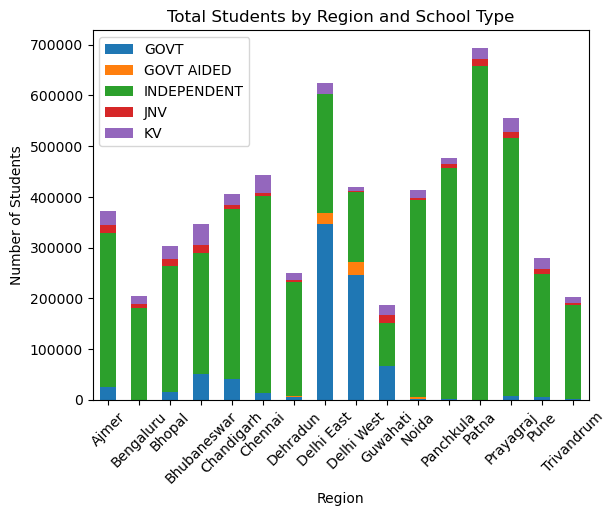

In [70]:
plt.figure(figsize=(12, 6))
df.groupby("Region")[["GOVT", "GOVT AIDED", "INDEPENDENT", "JNV", "KV"]].sum().plot(kind='bar', stacked=True)
plt.title("Total Students by Region and School Type")
plt.xlabel("Region")
plt.ylabel("Number of Students")
plt.xticks(rotation=45)
plt.show()

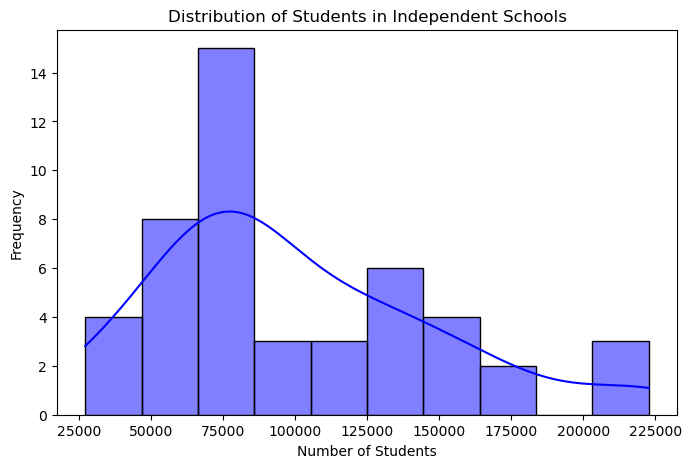

In [72]:
plt.figure(figsize=(8, 5))
sns.histplot(df["INDEPENDENT"], bins=10, kde=True, color="blue")
plt.title("Distribution of Students in Independent Schools")
plt.xlabel("Number of Students")
plt.ylabel("Frequency")
plt.show()

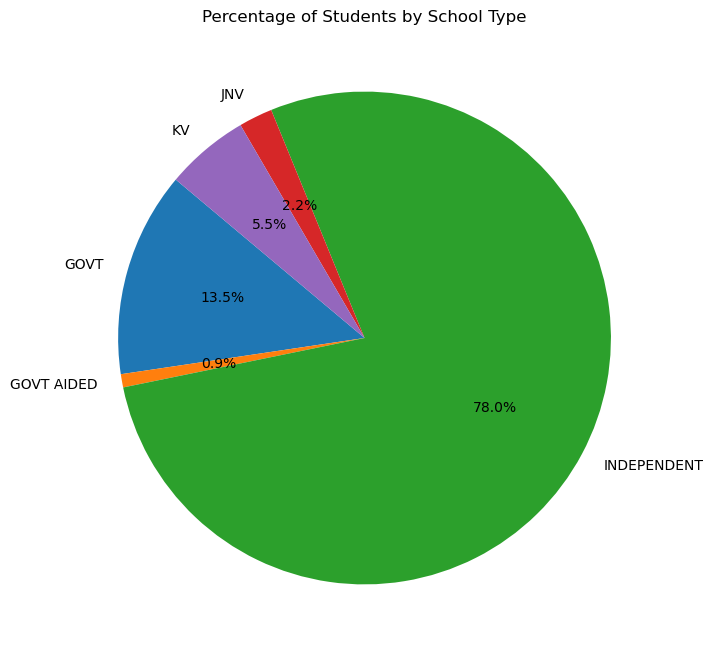

In [74]:
total_students = df[["GOVT", "GOVT AIDED", "INDEPENDENT", "JNV", "KV"]].sum()
plt.figure(figsize=(8, 8))
plt.pie(total_students, labels=total_students.index, autopct="%1.1f%%", startangle=140)
plt.title("Percentage of Students by School Type")
plt.show()

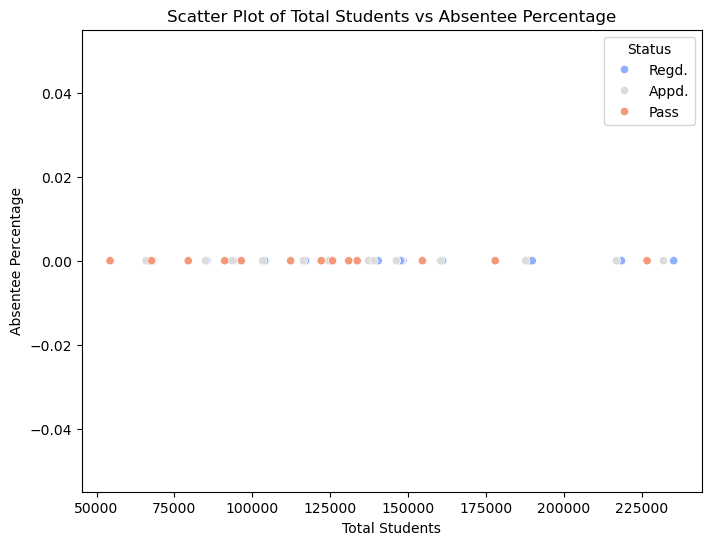

In [76]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["Total_Students"], y=df["Absentee_Percent"], hue=df["Status"], palette="coolwarm")
plt.title("Scatter Plot of Total Students vs Absentee Percentage")
plt.xlabel("Total Students")
plt.ylabel("Absentee Percentage")
plt.show()

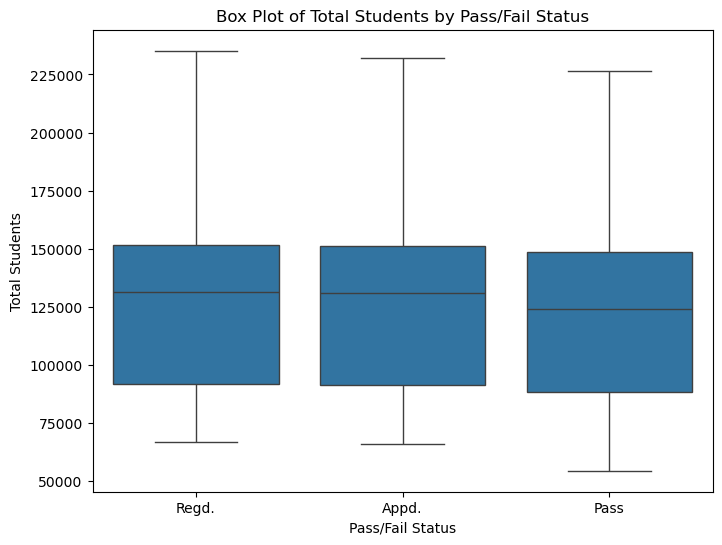

In [78]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="Status", y="Total_Students", data=df)
plt.title("Box Plot of Total Students by Pass/Fail Status")
plt.xlabel("Pass/Fail Status")
plt.ylabel("Total Students")
plt.show()

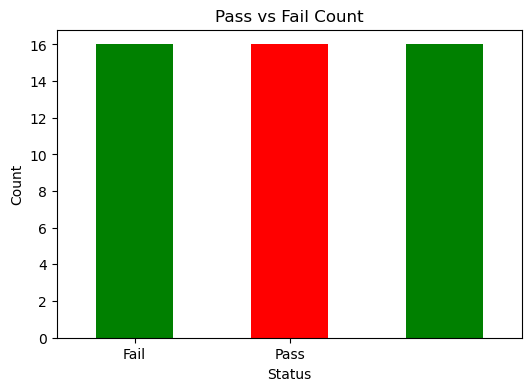

In [14]:
plt.figure(figsize=(6, 4))
df["Status"].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title("Pass vs Fail Count")
plt.xlabel("Status")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1], labels=["Fail", "Pass"], rotation=0)
plt.show()

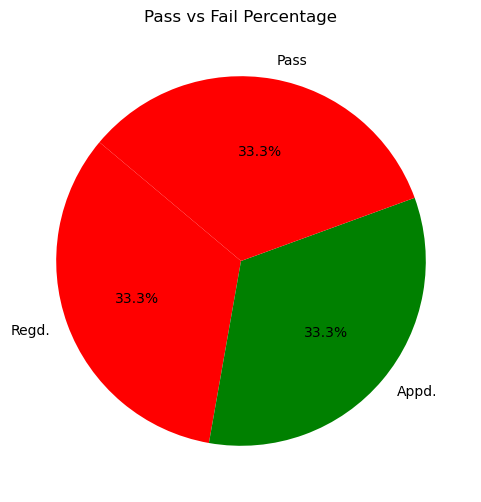

In [15]:
plt.figure(figsize=(6, 6))
df["Status"].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['red', 'green'], startangle=140)
plt.title("Pass vs Fail Percentage")
plt.ylabel("")
plt.show()

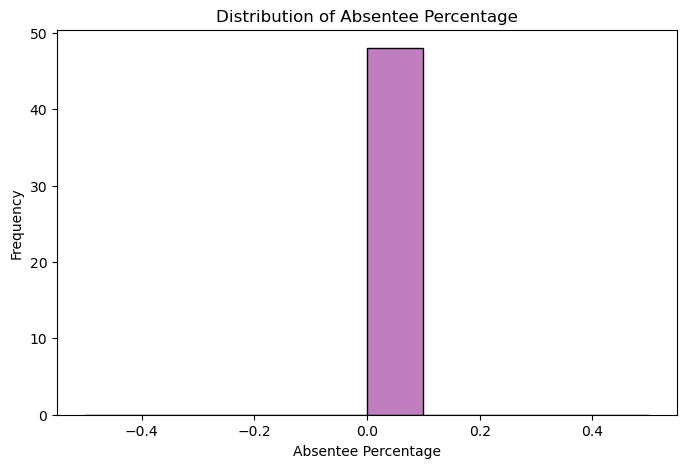

In [20]:
plt.figure(figsize=(8, 5))
sns.histplot(df["Absentee_Percent"], bins=10, kde=True, color="purple")
plt.title("Distribution of Absentee Percentage")
plt.xlabel("Absentee Percentage")
plt.ylabel("Frequency")
plt.show()


In [24]:
df

,Class,Year,Region,Status,CTSA,GOVT,GOVT AIDED,INDEPENDENT,JNV,KV,Total_Students,Absentee_Percent
0,10,2022,Ajmer,Regd.,0.0,8537,0.0,102253,4945,9194,124929.0,0.0
1,10,2022,Ajmer,Appd.,0.0,8509,0.0,101822,4928,9160,124419.0,0.0
2,10,2022,Ajmer,Pass,0.0,8154,0.0,100178,4911,8875,122118.0,0.0
3,10,2022,Bengaluru,Regd.,99.0,151,0.0,60667,2442,5108,68368.0,0.0
4,10,2022,Bengaluru,Appd.,97.0,151,0.0,60555,2440,5093,68239.0,0.0
5,10,2022,Bengaluru,Pass,94.0,151,0.0,60089,2440,5042,67722.0,0.0
6,10,2022,Bhopal,Regd.,0.0,5802,0.0,84877,4171,9126,103976.0,0.0
7,10,2022,Bhopal,Appd.,0.0,5681,0.0,84390,4160,9094,103325.0,0.0
8,10,2022,Bhopal,Pass,0.0,4837,0.0,79048,4152,8406,96443.0,0.0
9,10,2022,Bhubaneswar,Regd.,102.0,17252,0.0,81012,5295,13489,117048.0,0.0


In [40]:
df.size


576

In [44]:
df.shape

(48, 12)

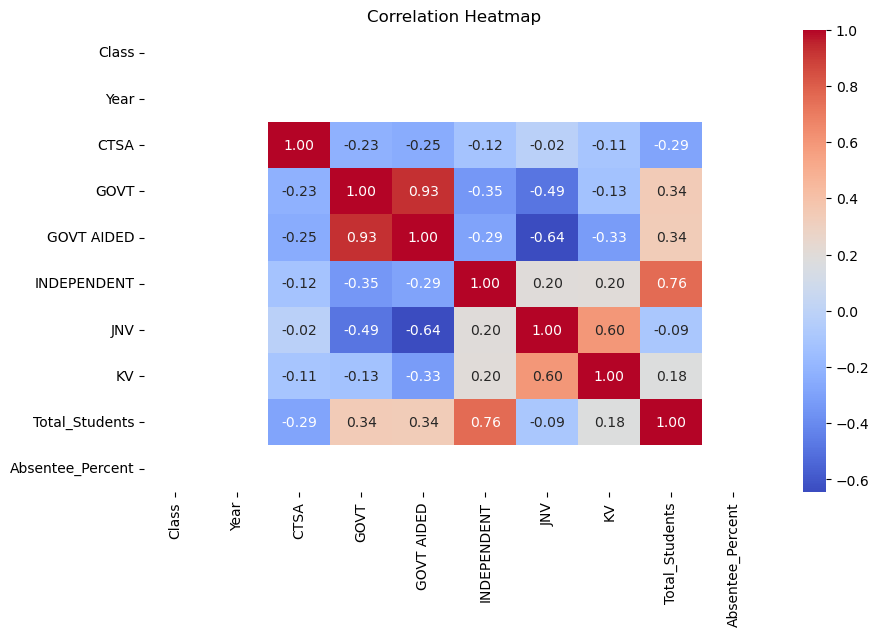

In [48]:
numeric_df = df.select_dtypes(include=['number'])
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [78]:
subject_columns = ["Maths", "Science", "English", "Social", "Language"]
for col in subject_columns:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)

In [80]:
if all(col in df.columns for col in subject_columns):
    df["Average_Score"] = df[subject_columns].mean(axis=1)
    df["Topper_Score"] = df[subject_columns].max(axis=1)
    df["Lowest_Score"] = df[subject_columns].min(axis=1)

In [82]:
df.columns

Index(['Class', 'Year', 'Region', 'Status', 'CTSA', 'GOVT', 'GOVT AIDED',
       'INDEPENDENT', 'JNV', 'KV', 'Total_Students', 'Absentee_Percent'],
      dtype='object')

In [84]:
print("Available Columns:", df.columns)

Available Columns: Index(['Class', 'Year', 'Region', 'Status', 'CTSA', 'GOVT', 'GOVT AIDED',
       'INDEPENDENT', 'JNV', 'KV', 'Total_Students', 'Absentee_Percent'],
      dtype='object')


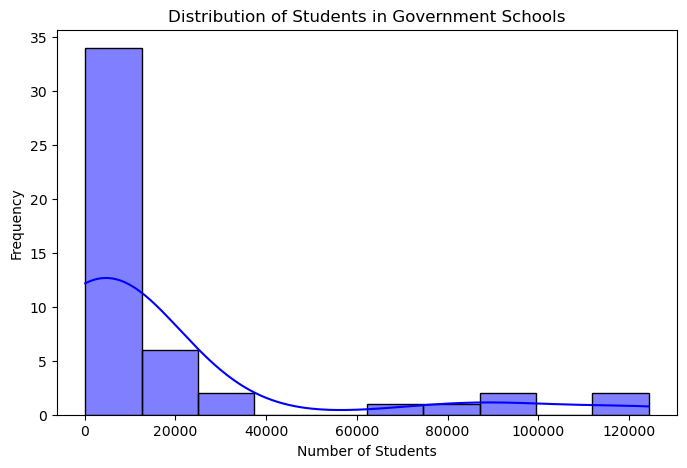

In [25]:
plt.figure(figsize=(8, 5))
sns.histplot(df['GOVT'], bins=10, kde=True, color='blue')
plt.title("Distribution of Students in Government Schools")
plt.xlabel("Number of Students")
plt.ylabel("Frequency")
plt.show()

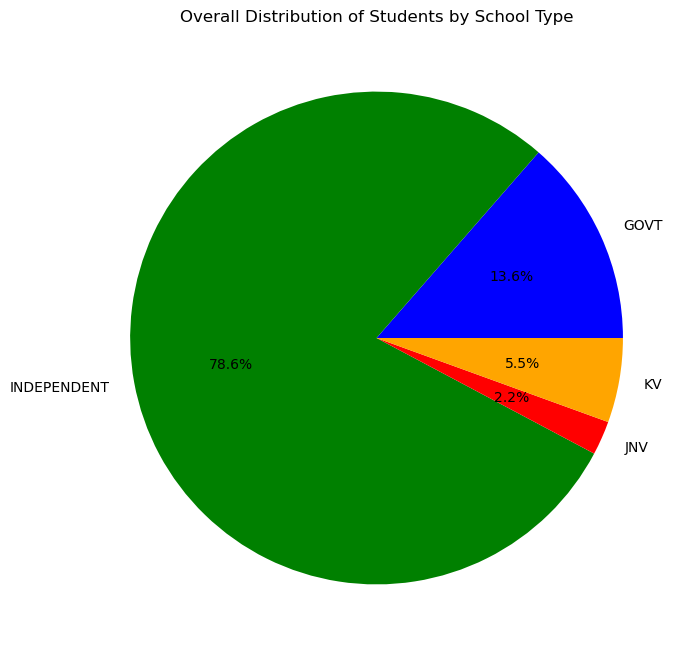

In [27]:
plt.figure(figsize=(8, 8))
school_types = ["GOVT", "INDEPENDENT", "JNV", "KV"]
total_students = df[school_types].sum()
plt.pie(total_students, labels=school_types, autopct='%1.1f%%', colors=['blue', 'green', 'red', 'orange'])
plt.title("Overall Distribution of Students by School Type")
plt.show()


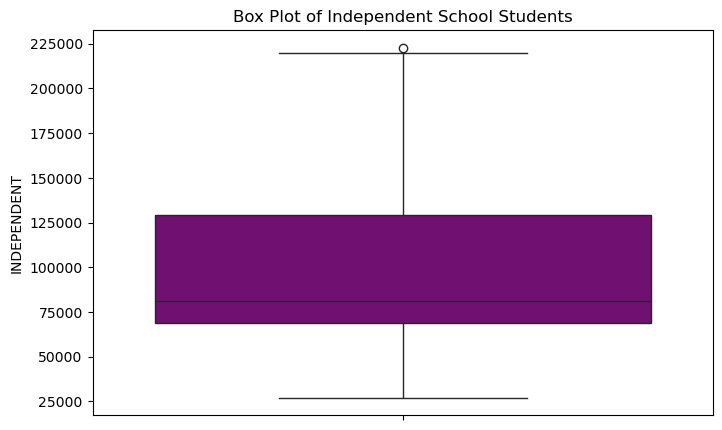

In [29]:
plt.figure(figsize=(8, 5))
sns.boxplot(y=df["INDEPENDENT"], color="purple")
plt.title("Box Plot of Independent School Students")
plt.show()

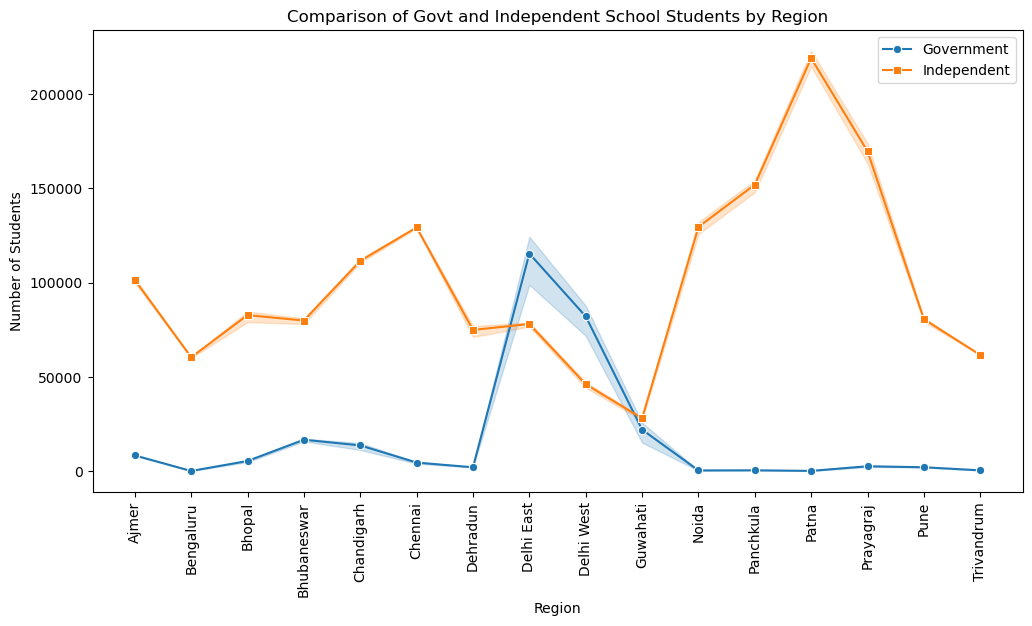

In [31]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Region', y='GOVT', data=df, label='Government', marker='o')
sns.lineplot(x='Region', y='INDEPENDENT', data=df, label='Independent', marker='s')
plt.xticks(rotation=90)
plt.title("Comparison of Govt and Independent School Students by Region")
plt.xlabel("Region")
plt.ylabel("Number of Students")
plt.legend()
plt.show()

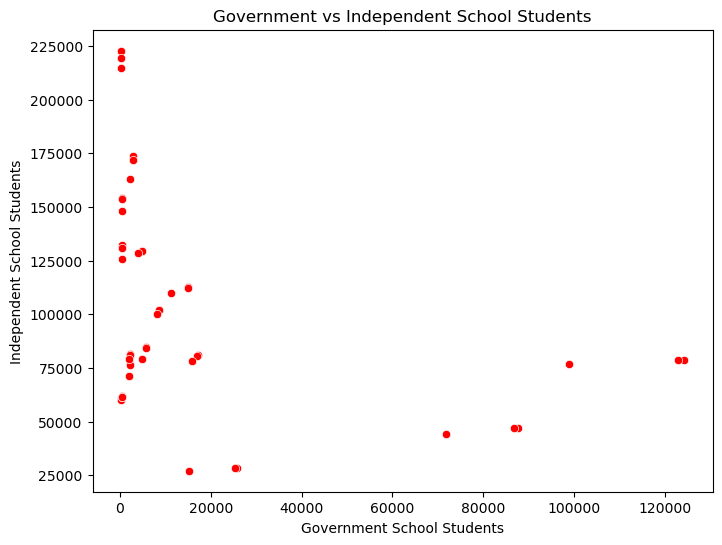

In [33]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['GOVT'], y=df['INDEPENDENT'], color='red')
plt.title("Government vs Independent School Students")
plt.xlabel("Government School Students")
plt.ylabel("Independent School Students")
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17672\810077212.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['GOVT'], shade=True, color='green')


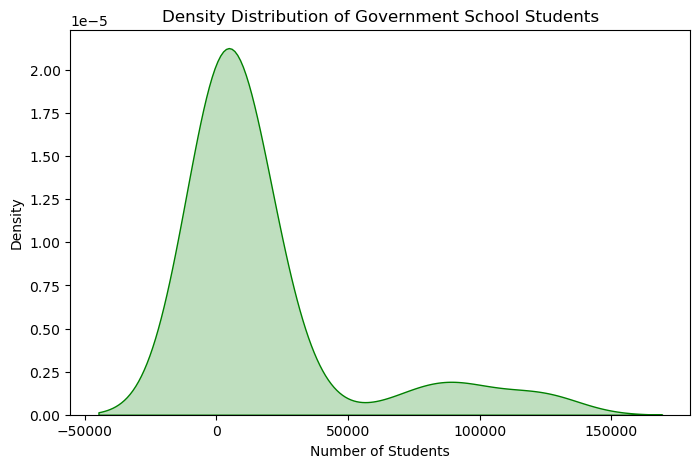

In [35]:
plt.figure(figsize=(8, 5))
sns.kdeplot(df['GOVT'], shade=True, color='green')
plt.title("Density Distribution of Government School Students")
plt.xlabel("Number of Students")
plt.show()
